In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.decomposition import PCA
from pathlib import Path

from sklearn.ensemble import RandomForestRegressor

In [2]:
pwd

'/Users/tigranmargarian/Yandex.Disk.localized/M/Kaggle:Projects/Adidas Data Challenge'

In [3]:
cd Downloads

[Errno 2] No such file or directory: 'Downloads'
/Users/tigranmargarian/Yandex.Disk.localized/M/Kaggle:Projects/Adidas Data Challenge


In [4]:
adidas = pd.read_csv('male_data_cleaned.csv')

In [5]:
adidas.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,axillaheight,biacromialbreadth,bicepscircumferenceflexed,bideltoidbreadth,chestbreadth,chestcircumference,...,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,verticaltrunkcircumferenceusa,weightkg,wristcircumference,wristheight,Heightin
0,10027,266,1467,337,1347,401,369,493,291,1074,...,600,1782,1776,1449,1092,1700,815,175,853,71
1,10032,233,1395,326,1293,394,338,479,269,1021,...,564,1745,1702,1387,1076,1627,726,167,815,68
2,10033,287,1430,341,1327,427,408,544,288,1120,...,604,1867,1735,1438,1105,1678,929,180,831,68
3,10092,234,1347,310,1239,401,359,518,296,1114,...,550,1708,1655,1346,1021,1625,794,176,793,66
4,10093,250,1585,372,1478,435,356,524,304,1048,...,641,2035,1914,1596,1292,1679,946,188,954,77


In [6]:
adidas.shape

(4082, 36)

In [7]:
chest = adidas.loc[:, ["chestdepth", "chestheight", "chestcircumference", "chestbreadth"]]

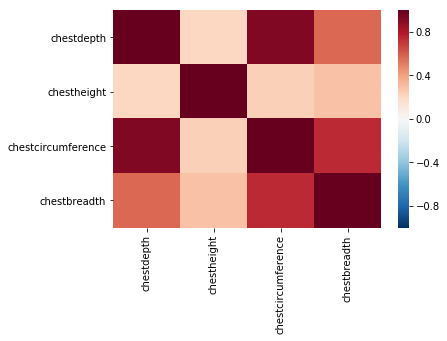

In [8]:
sns.heatmap(chest.corr(), vmin=-1, vmax=1, cmap='RdBu_r');

In [9]:
chest.head()

,chestdepth,chestheight,chestcircumference,chestbreadth
0,259,1292,1074,291
1,253,1244,1021,269
2,267,1288,1120,288
3,262,1205,1114,296
4,232,1452,1048,304


In [10]:
shoulder = adidas.loc[:, ["shoulderlength", "shoulderelbowlength", "shouldercircumference"]]

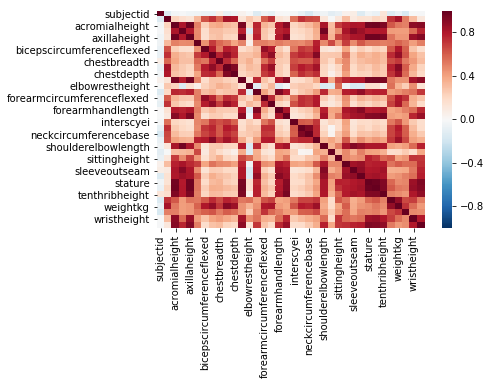

In [11]:
sns.heatmap(adidas.corr(), vmin=-1, vmax=1, cmap='RdBu_r');

In [12]:
adidas['chestheight'].corr(adidas['sleevelengthspinewrist'])

0.7634657905772412

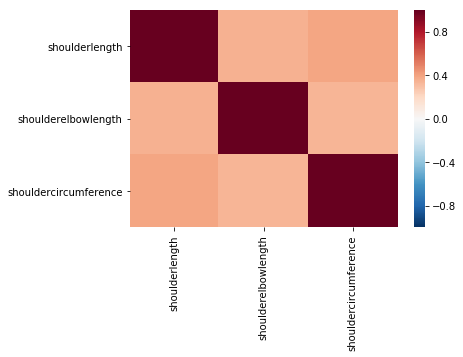

In [13]:
sns.heatmap(shoulder.corr(), vmin=-1, vmax=1, cmap='RdBu_r');

In [14]:
km = KMeans(n_clusters=4)
km.fit(chest)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

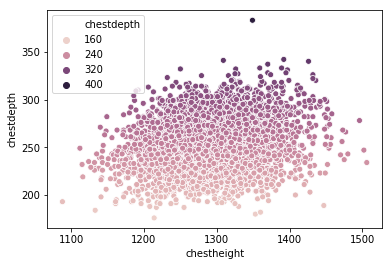

In [15]:
axes = sns.scatterplot(data=chest, x='chestheight', 
    y='chestdepth', hue='chestdepth', legend='brief')

In [16]:
pwd

'/Users/tigranmargarian/Yandex.Disk.localized/M/Kaggle:Projects/Adidas Data Challenge'

In [17]:
arm = adidas.loc[:, ["elbowrestheight",
                     "forearmcenterofgriplength",
                     "forearmcircumferenceflexed",
                     "forearmforearmbreadth",
                     "forearmhandlength",
                     "sleevelengthspinewrist",
                     "sleeveoutseam",
                     "span",
                     "wristcircumference",
                     "wristheight"]]

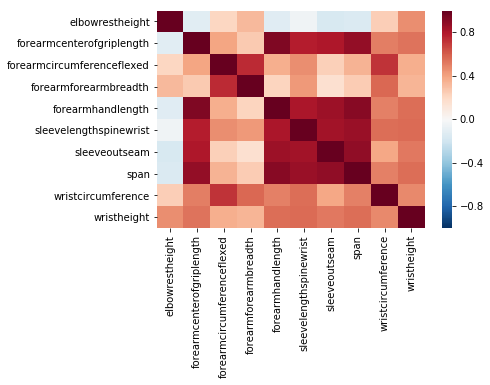

In [18]:
sns_plot = sns.heatmap(arm.corr(), vmin=-1, vmax=1, cmap='RdBu_r');
fig = sns_plot.get_figure()
fig.savefig("heatmap_example.png", dpi=300)

In [19]:
pca = PCA(n_components=1)
armPca = pca.fit_transform(arm)
armDf = pd.DataFrame(data = armPca, columns = ['single arm comp1'])

In [20]:
pca = PCA(n_components=1)
chestPca = pca.fit_transform(chest)
chestDf = pd.DataFrame(data = armPca, columns = ['single chest comp1'])

In [21]:
pca = PCA(n_components=1)
shoulderPca = pca.fit_transform(shoulder)
shoulderDf = pd.DataFrame(data = armPca, columns = ['single shoulder comp1'])

In [22]:
armDf

,single arm comp1
0,29.441181
1,94.946469
2,-52.290671
3,125.527822
4,-279.084188
...,...
4077,154.878268
4078,-18.575703
4079,175.205798
4080,72.358190


In [23]:
shoulderDf

,single shoulder comp1
0,29.441181
1,94.946469
2,-52.290671
3,125.527822
4,-279.084188
...,...
4077,154.878268
4078,-18.575703
4079,175.205798
4080,72.358190


In [24]:
chestDf

,single chest comp1
0,29.441181
1,94.946469
2,-52.290671
3,125.527822
4,-279.084188
...,...
4077,154.878268
4078,-18.575703
4079,175.205798
4080,72.358190


In [25]:
shirt_stack = pd.concat([shoulderDf, chestDf, armDf], axis=1)

In [26]:
shirt_stack

,single shoulder comp1,single chest comp1,single arm comp1
0,29.441181,29.441181,29.441181
1,94.946469,94.946469,94.946469
2,-52.290671,-52.290671,-52.290671
3,125.527822,125.527822,125.527822
4,-279.084188,-279.084188,-279.084188
...,...,...,...
4077,154.878268,154.878268,154.878268
4078,-18.575703,-18.575703,-18.575703
4079,175.205798,175.205798,175.205798
4080,72.358190,72.358190,72.358190


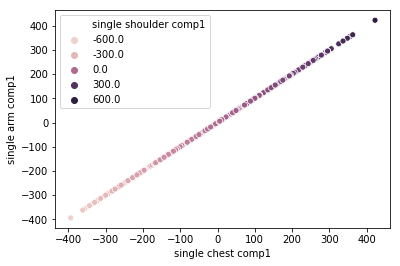

In [27]:
axes = sns.scatterplot(data=shirt_stack, x='single chest comp1', 
    y='single arm comp1', hue='single shoulder comp1', legend='brief')

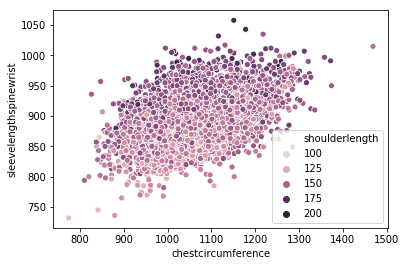

In [28]:
axes = sns.scatterplot(data=adidas, x='chestcircumference', 
    y='sleevelengthspinewrist', hue='shoulderlength', legend='brief')

plt.savefig('shirts_viz.png', dpi=300)

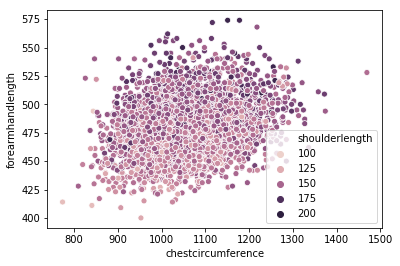

In [29]:
axes = sns.scatterplot(data=adidas, x='chestcircumference', 
    y='forearmhandlength', hue='shoulderlength', legend='brief')

In [30]:
shirt_df = adidas.loc[:, ['shoulderlength', 'chestcircumference', 'sleevelengthspinewrist']]

In [31]:
shirt_df

,shoulderlength,chestcircumference,sleevelengthspinewrist
0,145,1074,883
1,141,1021,868
2,167,1120,910
3,148,1114,848
4,180,1048,995
...,...,...,...
4077,150,954,865
4078,146,1072,903
4079,135,1045,860
4080,154,984,874


In [32]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(shirt_df)
y_kmeans = kmeans.predict(shirt_df)

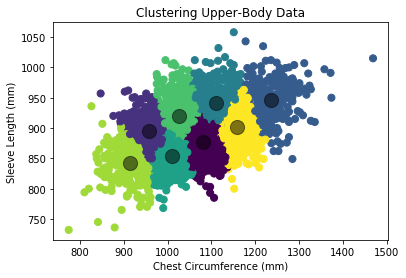

In [33]:
plt.scatter(shirt_df.loc[:, "chestcircumference"],
            shirt_df.loc[:, "sleevelengthspinewrist"], c=y_kmeans, s=50, cmap='viridis')

plt.xlabel('Chest Circumference (mm)')
plt.ylabel('Sleeve Length (mm)')
plt.title('Clustering Upper-Body Data')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);

plt.savefig('shirts2.png', dpi=300)

In [34]:
centers

array([[ 145.80204342, 1080.44189017,  877.78671775],
       [ 151.34917355,  957.39049587,  894.48553719],
       [ 155.96899225, 1236.89147287,  945.87596899],
       [ 155.5       , 1110.54743083,  941.78063241],
       [ 144.4020979 , 1009.49825175,  854.09265734],
       [ 154.03120125, 1027.        ,  920.32605304],
       [ 145.62903226,  914.14516129,  842.58064516],
       [ 148.80681818, 1159.26704545,  902.20265152]])

In [35]:
pd.DataFrame(centers)

,0,1,2
0,145.802043,1080.441890,877.786718
1,151.349174,957.390496,894.485537
2,155.968992,1236.891473,945.875969
3,155.500000,1110.547431,941.780632
4,144.402098,1009.498252,854.092657
5,154.031201,1027.000000,920.326053
6,145.629032,914.145161,842.580645
7,148.806818,1159.267045,902.202652


In [36]:
shirt_df.loc[:, "log_sleeve"] = np.log10(shirt_df.loc[:, "sleevelengthspinewrist"])

In [37]:
shirt_df

,shoulderlength,chestcircumference,sleevelengthspinewrist,log_sleeve
0,145,1074,883,2.945961
1,141,1021,868,2.938520
2,167,1120,910,2.959041
3,148,1114,848,2.928396
4,180,1048,995,2.997823
...,...,...,...,...
4077,150,954,865,2.937016
4078,146,1072,903,2.955688
4079,135,1045,860,2.934498
4080,154,984,874,2.941511


In [38]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(shirt_df)
y_kmeans = kmeans.predict(shirt_df)

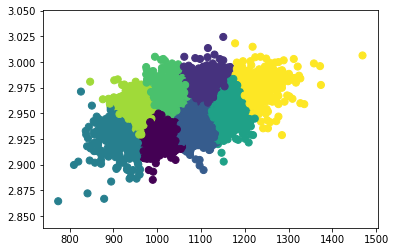

In [39]:
plt.scatter(shirt_df.loc[:, "chestcircumference"], shirt_df.loc[:, "log_sleeve"], c=y_kmeans, s=50, cmap='viridis')

In [40]:
shirt_df

,shoulderlength,chestcircumference,sleevelengthspinewrist,log_sleeve
0,145,1074,883,2.945961
1,141,1021,868,2.938520
2,167,1120,910,2.959041
3,148,1114,848,2.928396
4,180,1048,995,2.997823
...,...,...,...,...
4077,150,954,865,2.937016
4078,146,1072,903,2.955688
4079,135,1045,860,2.934498
4080,154,984,874,2.941511


In [41]:
shirt_df.loc[:, "chestsleveratio"] = shirt_df.loc[:, "chestcircumference"] / shirt_df.loc[:, "sleevelengthspinewrist"]

In [42]:
shirt_df

,shoulderlength,chestcircumference,sleevelengthspinewrist,log_sleeve,chestsleveratio
0,145,1074,883,2.945961,1.216308
1,141,1021,868,2.938520,1.176267
2,167,1120,910,2.959041,1.230769
3,148,1114,848,2.928396,1.313679
4,180,1048,995,2.997823,1.053266
...,...,...,...,...,...
4077,150,954,865,2.937016,1.102890
4078,146,1072,903,2.955688,1.187154
4079,135,1045,860,2.934498,1.215116
4080,154,984,874,2.941511,1.125858


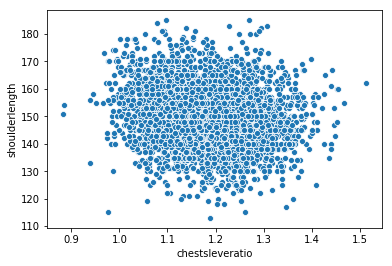

In [43]:
axes = sns.scatterplot(data=shirt_df, x='chestsleveratio', 
    y='shoulderlength', legend='brief')

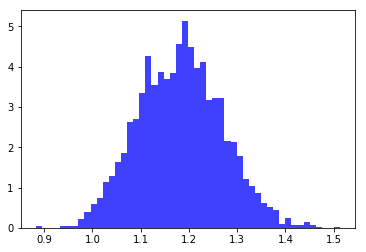

In [44]:
axes = plt.hist(shirt_df.loc[:, "chestsleveratio"], 50, density=True, facecolor='b', alpha=0.75)

In [45]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(adidas)
y_kmeans = kmeans.predict(adidas)

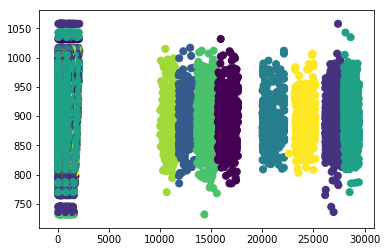

In [46]:

for x in adidas.columns:
    plt.scatter(adidas.loc[:, x],
                adidas.loc[:, "sleevelengthspinewrist"], c=y_kmeans, s=50, cmap='viridis')


## centers = kmeans.cluster_centers_
## plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);

In [47]:
adidas.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'axillaheight', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bideltoidbreadth', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'elbowrestheight',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed',
       'forearmforearmbreadth', 'forearmhandlength', 'iliocristaleheight',
       'interscyei', 'neckcircumference', 'neckcircumferencebase',
       'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span',
       'stature', 'suprasternaleheight', 'tenthribheight',
       'verticaltrunkcircumferenceusa', 'weightkg', 'wristcircumference',
       'wristheight', 'Heightin'],
      dtype='object')

In [48]:
pwd

'/Users/tigranmargarian/Yandex.Disk.localized/M/Kaggle:Projects/Adidas Data Challenge'

In [49]:
adidas_f = pd.read_csv('adidas_female.csv')

In [50]:
adidas_f.loc[:, "chestcircumference"]

0        922
1        839
2        874
3       1008
4       1089
        ... 
1981    1082
1982    1016
1983    1093
1984     922
1985     902
Name: chestcircumference, Length: 1986, dtype: int64

In [51]:
shirt_fem = adidas_f.loc[:, ["chestcircumference", "sleevelengthspinewrist", "shoulderlength"]]

In [52]:
shirt_fem

,chestcircumference,sleevelengthspinewrist,shoulderlength
0,922,809,148
1,839,810,142
2,874,855,164
3,1008,815,157
4,1089,810,156
...,...,...,...
1981,1082,840,145
1982,1016,794,142
1983,1093,848,136
1984,922,791,136


In [53]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(shirt_fem)
y_kmeans = kmeans.predict(shirt_fem)

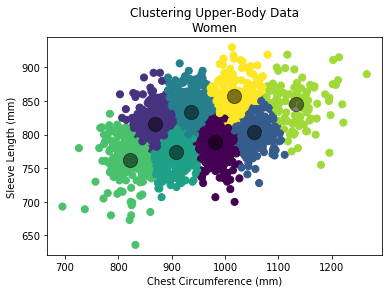

In [54]:
plt.scatter(shirt_fem.loc[:, "chestcircumference"],
            shirt_fem.loc[:, "sleevelengthspinewrist"], c=y_kmeans, s=50, cmap='viridis')

plt.xlabel('Chest Circumference (mm)')
plt.ylabel('Sleeve Length (mm)')
plt.title('Clustering Upper-Body Data\nWomen')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.savefig('shirts_fem.png', dpi=300)

In [55]:
centers

array([[ 981.76307692,  789.64307692,  132.10769231],
       [ 868.62989324,  816.1886121 ,  138.14234875],
       [1053.53475936,  804.38502674,  134.31016043],
       [ 936.77714286,  833.92857143,  139.84571429],
       [ 908.08381503,  774.57803468,  130.17630058],
       [ 821.96534653,  762.87623762,  130.47029703],
       [1133.51923077,  845.44230769,  138.41346154],
       [1017.27225131,  857.42408377,  142.97905759]])